In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import seaborn as sns

In [40]:
#导入数据
data= pd.read_csv(r'WorldIndex.csv' )

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [42]:
data1=data.dropna(subset=['Life_expectancy'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 176
Data columns (total 5 columns):
Country            169 non-null object
Continent          169 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     164 non-null float64
Population         168 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


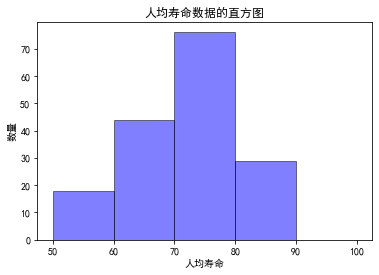

In [43]:
#1.人均寿命数据的直方图
x=data1['Life_expectancy']
plt.rcParams['font.sans-serif']=['SimHei']
plt.xlabel('人均寿命')
plt.ylabel('数量')
plt.title("人均寿命数据的直方图")
plt.hist(x,bins=[50,60,70,80,90,100],facecolor='blue',edgecolor='black',alpha=0.5)
plt.show()

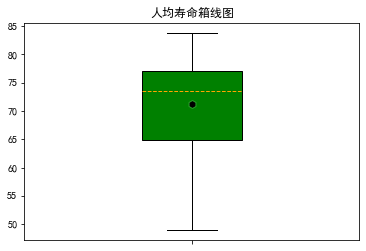

In [44]:
#2.人均寿命箱线图
x=data1['Life_expectancy']  
plt.boxplot(x,whis=1.5,widths=0.3,patch_artist=True,showmeans=True,boxprops={'facecolor':'green'},flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':3},meanprops={'marker':'h','markerfacecolor':'black','markersize':8},medianprops={'linestyle':'--','color':'orange'},labels=[''])
plt.title("人均寿命箱线图")
plt.show()

In [45]:
data2=data.dropna(subset=['GDP_per_capita'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 175
Data columns (total 5 columns):
Country            169 non-null object
Continent          169 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     169 non-null float64
Population         169 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


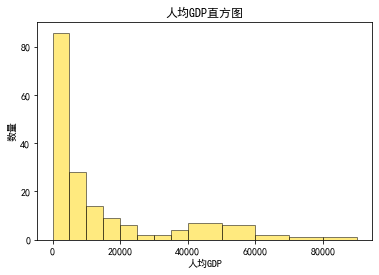

In [46]:
#3.人均GDP直方图
x=data2['GDP_per_capita']
plt.rcParams['font.sans-serif']=['SimHei']
plt.xlabel('人均GDP')
plt.ylabel('数量')
plt.title("人均GDP直方图")
plt.hist(x,bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,70000,80000,90000],facecolor='gold',edgecolor='black',alpha=0.5)
plt.show()

In [47]:
data3=data.groupby('Continent')
data3

In [48]:
data3['Country'].count()

Continent
Africa           50
Asia             36
Europe           45
North America    20
Oceania          14
South America    12
Name: Country, dtype: int64

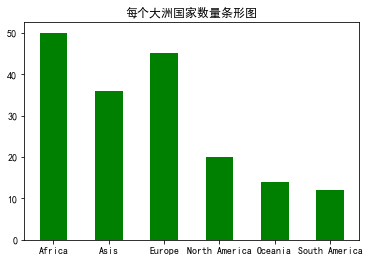

In [49]:
#4.每个大洲的国家个数条形图
x=['Africa','Asis','Europe','North America','Oceania','South America']
height=[50,36,45,20,14,12]
plt.bar(x,height,width=0.5,align='center',color='green',alpha=1)  
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('每个大洲国家数量条形图')
plt.show()

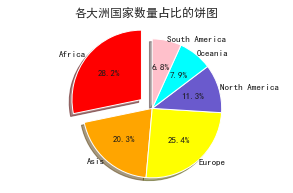

In [61]:
#5.各大洲国家数量占比的饼图
plt.figure(figsize=(5,3))
labels=['Africa','Asis','Europe','North America','Oceania','South America']
sizes=[50,36,45,20,14,12]
colors=['red','orange','yellow','slateblue','cyan','pink']
plt.pie(sizes,labels=labels,colors=colors,labeldistance=1.02,autopct='%.1f%%',startangle=90,radius=0.5,center=(0.2,0.2),textprops={'fontsize':9,'color':'k'},pctdistance=0.6,explode=(0.1,0,0,0,0,0),shadow=True)
plt.axis('equal')
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('各大洲国家数量占比的饼图')
plt.show()

In [51]:
data4=data2.dropna(subset=['Life_expectancy'])
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
Country            164 non-null object
Continent          164 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     164 non-null float64
Population         164 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


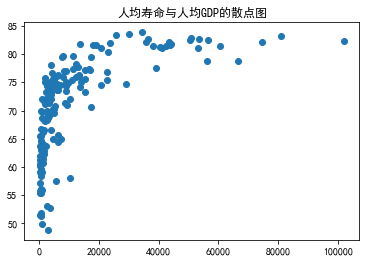

In [52]:
#6.人均寿命和人均GDP的散点图
x=data4['GDP_per_capita']                
y=data4['Life_expectancy']
plt.scatter(x,y)
plt.title("人均寿命与人均GDP的散点图")
plt.show()

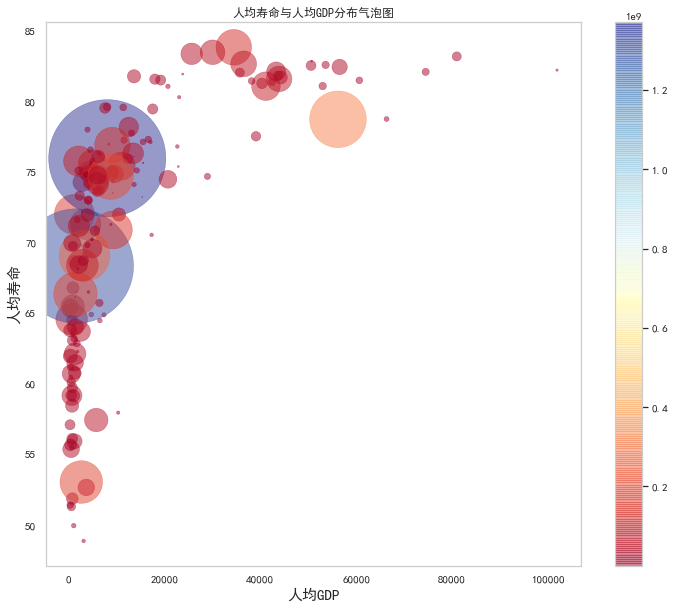

In [53]:
#7.人均GDP与人均寿命的气泡图
def DrawBubble(read_name):
    sns.set(style = "whitegrid")
    x = data4.GDP_per_capita
    y = data4.Life_expectancy
    z = data4.Population
    plt.rcParams['font.sans-serif']=['SimHei']
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (12,10))
    bubble = ax.scatter(x,y, s = z*0.00001, c = z, cmap = cm, linewidth = 0.5, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
    ax.set_xlabel('人均GDP', fontsize = 15)
    ax.set_ylabel('人均寿命', fontsize = 15)
    plt.title("人均寿命与人均GDP分布气泡图")
plt.show()
if __name__=='__main__':
    DrawBubble("WorldIndex.csv")